<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/model_prediction_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [4]:
test = pd.read_csv("/content/drive/MyDrive/test (1).csv", index_col = 0)

In [5]:
train = pd.read_csv("/content/drive/MyDrive/train (2).csv", index_col = 0)

In [9]:
test.shape

(121, 74)

In [10]:
validation_data = test.iloc[0:20,:]

In [12]:
test = test.iloc[20:,:]

In [14]:
test.shape

(101, 74)

In [15]:
validation_data.shape

(20, 74)

In [7]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status,infection
0,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,0,0,0,0,0,0,0,0,1,1
1,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,0,0,0,1,0,0,0,0,0,1
2,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,0,0,0,0,0,0,0,0,1,1
3,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,1,0,0,0,0,0,0,0,1,1
4,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,0,0,0,0,0,0,0,0,1,1


In [16]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_D', 'batch_E',
       'batch_F', 'batch_G', 'batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T', 'batch_U', 'ctnum_median_status',
       'infection'],
      dtype='object')

In [19]:
train = train.drop(['batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'batch_N'], axis = 1)

In [29]:
test = test.drop(['V19'], axis = 1)

In [30]:
val_data = validation_data.drop(['batch_N', 'batch_O', 'batch_P', 'batch_Q',
       'batch_R', 'batch_S', 'batch_T','batch_H', 'batch_I', 'batch_J', 'batch_K',
       'batch_L', 'batch_M', 'V19','batch_N'], axis = 1)

In [31]:
train.shape

(652, 61)

In [32]:
test.shape

(101, 60)

In [33]:
val_data.shape

(20, 60)

In [36]:
train = train.drop(['batch_D'], axis = 1)

In [37]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [35]:
test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32',
       'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42',
       'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'agenum_random',
       'ctnum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E', 'batch_F',
       'batch_G', 'batch_U', 'ctnum_median_status', 'infection'],
      dtype='object')

In [38]:
X_train = train.drop(['infection'], axis = 1)

In [39]:
y_train = train['infection']

In [40]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_U,ctnum_median_status
0,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,...,50.000000,22.810000,0,0,0,0,0,0,0,1
1,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,...,62.000000,19.350000,0,0,0,0,0,0,0,0
2,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,...,72.000000,21.340000,0,0,0,0,0,0,0,1
3,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,...,30.000000,25.360000,0,0,0,0,0,0,0,1
4,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,...,35.000000,24.410000,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,-0.161713,-0.138092,-0.178348,-0.153533,-0.123782,-0.161619,-0.180359,-0.149368,-0.237363,-0.292597,...,64.999349,22.481452,0,0,0,0,0,0,0,0
648,-0.296854,0.013780,0.037688,-0.010611,-0.100738,-0.013722,-0.293075,0.146741,-0.079878,-0.115521,...,40.333857,23.230031,0,0,0,0,0,0,0,1
649,0.115255,0.147814,0.080500,0.042172,0.233514,-0.001428,0.154735,0.223660,-0.016480,0.191527,...,63.848260,21.019534,0,0,0,0,0,0,0,0
650,-0.082016,0.016213,0.181865,-0.056005,0.036137,-0.037511,-0.086896,-0.057951,-0.045582,-0.079661,...,14.968711,20.887817,0,0,0,0,0,0,0,0


In [41]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
647    0
648    0
649    0
650    0
651    0
Name: infection, Length: 652, dtype: int64

In [42]:
X_test = test.drop(['infection'], axis = 1)

In [43]:
y_test = test['infection']

In [44]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_U,ctnum_median_status
247,0.118224,-0.068840,-0.220322,-0.165029,-0.003831,-0.258422,-0.213456,-0.260325,-0.098703,-0.124774,...,56.0,25.37,0,0,0,1,0,0,0,1
477,-0.000766,0.172883,0.164963,-0.342729,0.166574,-0.107734,-0.283509,0.156362,-0.315183,-0.114388,...,46.0,19.29,0,0,0,0,0,0,0,0
281,0.002948,-0.157300,-0.178674,0.285923,0.143752,0.134271,-0.004039,0.258009,0.436787,-0.006317,...,19.0,24.82,0,0,0,0,0,0,0,1
463,0.112248,0.172459,0.251792,-0.330378,0.373551,-0.085489,-0.364231,0.090206,-0.239000,-0.021638,...,66.0,19.50,0,0,0,0,0,0,1,0
33,-0.008352,-0.074332,-0.238685,-0.291133,0.253526,-0.248288,-0.040242,-0.237168,-0.392581,-0.109589,...,68.0,19.29,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,-0.345858,-0.184016,-0.267976,-0.402239,-0.146177,-0.190639,-0.219773,-0.240624,-0.278037,-0.276137,...,72.0,21.12,0,0,0,0,0,0,0,0
113,-0.437532,-0.172444,-0.003209,-0.007867,-0.018803,-0.055248,-0.353687,0.062032,0.058762,-0.226611,...,54.0,16.84,0,0,0,0,0,0,0,0
272,0.085456,-0.017223,0.110324,-0.356316,0.245826,-0.166763,0.105081,-0.011678,-0.292295,-0.055272,...,72.0,19.11,0,0,0,0,0,0,0,0
311,-0.398452,-0.338095,-0.451013,-0.261519,-0.053643,-0.221453,-0.169615,-0.414323,-0.213793,-0.310667,...,65.0,26.11,0,0,0,1,0,0,0,1


In [45]:
y_test

247    1
477    0
281    1
463    0
33     1
      ..
31     1
113    1
272    1
311    1
395    1
Name: infection, Length: 101, dtype: int64

In [46]:
val_X = val_data.drop(['infection'], axis = 1)

In [47]:
val_y = val_data['infection']

In [48]:
val_X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_U,ctnum_median_status
418,0.416963,0.181283,0.064580,-0.256586,-0.022616,-0.317925,0.376913,0.086584,-0.255495,0.096489,...,37.0,28.4300,0,0,0,0,0,0,0,1
474,0.199633,0.206295,0.288382,-0.150975,0.394386,0.075909,-0.368996,0.323212,0.079250,0.018757,...,24.0,20.4400,0,0,0,0,0,0,0,0
181,-0.431797,-0.050736,0.030278,-0.117923,0.246983,-0.160531,-0.197276,0.083967,0.028719,-0.148602,...,31.0,15.6400,0,0,0,0,0,0,0,0
446,-0.379012,0.039950,0.292831,0.174339,0.256258,-0.020767,-0.409595,0.085018,0.011241,0.117534,...,22.0,24.1700,0,0,0,0,0,0,0,1
297,0.451459,-0.048828,-0.089349,-0.151467,0.136524,-0.169697,0.116059,-0.235683,-0.048781,0.168612,...,70.0,25.5300,0,0,0,1,0,0,0,1
148,0.517892,0.166558,0.063383,0.132554,-0.194953,0.251701,0.468951,0.356290,0.119660,0.310991,...,20.0,24.1700,0,0,0,0,0,0,0,1
380,0.196697,-0.125266,-0.044279,-0.382407,-0.187755,-0.502705,0.158471,-0.153866,-0.245726,-0.059669,...,18.0,21.4600,0,0,0,0,0,0,0,0
386,-0.274328,-0.088122,-0.355619,-0.220709,-0.245031,-0.182536,-0.239657,-0.241508,0.045283,-0.232010,...,37.0,17.0900,0,0,0,0,0,0,0,0
479,0.048350,0.203425,0.292148,-0.066557,0.333795,0.169132,-0.360702,0.233100,-0.189518,0.083925,...,41.0,25.5800,0,0,0,0,0,0,0,1
227,-0.222839,-0.158885,-0.120375,-0.231332,-0.299132,-0.233906,-0.144302,-0.383421,-0.359472,-0.198014,...,35.0,24.1800,0,0,1,0,0,0,0,1


In [49]:
val_y

418    1
474    0
181    1
446    0
297    1
148    1
380    1
386    1
479    0
227    1
9      1
175    1
478    0
323    1
211    1
427    1
84     1
30     1
238    1
90     1
Name: infection, dtype: int64

In [51]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,val_X.shape,val_y.shape

((652, 59), (652,), (101, 59), (101,), (20, 59), (20,))

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
scaler.fit(X_train)

StandardScaler()

In [58]:
scaled_train_X = scaler.transform(X_train)
scaled_test_X = scaler.transform(X_test)

In [64]:
X_train_scaled = pd.DataFrame(scaled_train_X, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaled_test_X, columns=X_test.columns)

In [57]:
scaler.mean_

array([-5.01902496e-02, -2.61684443e-03,  1.95972648e-02, -5.15043479e-02,
        3.00940008e-02, -2.31696966e-02, -9.78866749e-02,  2.90115010e-02,
       -5.98484699e-02, -2.17485092e-02,  1.04882212e-02,  3.99602242e-02,
        1.88609723e-02,  3.43846061e-02, -4.13738798e-02,  4.60588957e-02,
       -5.86368407e-02, -2.38573082e-01, -1.99823070e-02, -1.78688790e-02,
       -5.30173076e-02, -9.73770074e-02, -1.49283192e-02, -5.62469374e-02,
       -2.48367944e-02, -4.60393645e-02,  1.45341433e-02,  1.42224860e-02,
        3.14782048e-02, -1.02904278e-01,  2.95903818e-02,  2.03594560e-02,
        5.20376634e-02,  2.52084663e-02,  3.00995287e-02,  2.85076600e-02,
        1.29533119e-02, -9.05665674e-03,  1.94747171e-02, -8.22685106e-03,
        1.33318880e-02, -6.85306245e-02,  1.02949146e-02,  3.61256862e-02,
       -1.07698817e-01,  1.53509805e-02, -7.75359259e-02,  2.66446466e-02,
        5.07555258e-03,  5.09257591e+01,  2.15303327e+01,  2.60736196e-02,
        1.68711656e-02,  

In [66]:
np.round(X_train.describe(), 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_U,ctnum_median_status
count,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,...,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0
mean,-0.1,-0.0,0.0,-0.1,0.0,-0.0,-0.1,0.0,-0.1,-0.0,...,50.9,21.5,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.4
std,0.3,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,...,18.6,3.1,0.2,0.1,0.1,0.2,0.2,0.1,0.3,0.5
min,-0.6,-0.4,-0.4,-0.5,-0.4,-0.6,-0.6,-0.4,-0.5,-0.5,...,2.0,13.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-0.3,-0.1,-0.1,-0.2,-0.1,-0.2,-0.3,-0.1,-0.2,-0.1,...,36.0,19.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-0.1,0.0,0.0,-0.0,0.0,-0.0,-0.2,0.0,-0.1,-0.0,...,52.0,21.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.2,0.0,0.1,...,65.0,23.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,0.7,0.4,0.4,0.5,0.5,0.5,0.6,0.5,0.6,0.4,...,89.0,30.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [67]:
np.round(X_train_scaled.describe(), 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_U,ctnum_median_status
count,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,...,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0
mean,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.1,-2.7,-2.7,-2.6,-2.2,-2.7,-2.0,-2.5,-2.4,-2.9,...,-2.6,-2.8,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.3,-0.9
25%,-0.8,-0.6,-0.7,-0.7,-0.8,-0.7,-0.8,-0.8,-0.7,-0.6,...,-0.8,-0.7,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.3,-0.9
50%,-0.0,0.0,0.1,0.1,-0.0,0.0,-0.2,-0.1,-0.1,0.1,...,0.1,-0.0,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.3,-0.9
75%,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.6,0.6,...,0.8,0.7,-0.2,-0.1,-0.1,-0.2,-0.2,-0.1,-0.3,1.1
max,2.8,2.8,2.2,3.1,2.6,2.6,2.9,2.3,3.9,2.6,...,2.1,2.9,6.1,7.6,6.8,5.8,6.3,7.6,3.5,1.1


In [69]:
import matplotlib.pyplot as plt

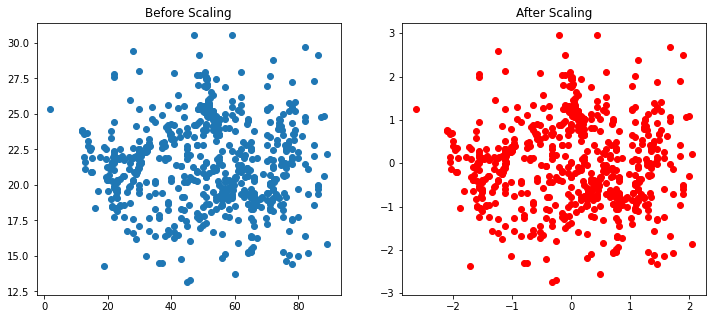

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['agenum_random'], X_train['ctnum_random'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['agenum_random'], X_train_scaled['ctnum_random'],color='red')
ax2.set_title("After Scaling")
plt.show()

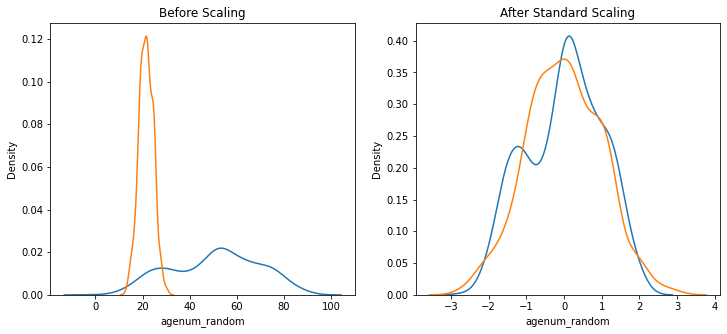

In [73]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['agenum_random'], ax=ax1)
sns.kdeplot(X_train['ctnum_random'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['agenum_random'], ax=ax2)
sns.kdeplot(X_train_scaled['ctnum_random'], ax=ax2)
plt.show()

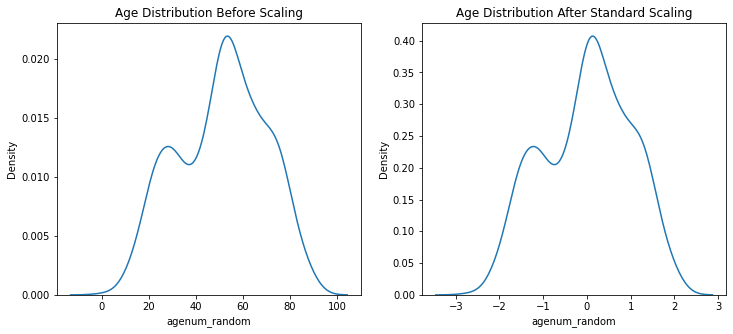

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['agenum_random'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['agenum_random'], ax=ax2)
plt.show()

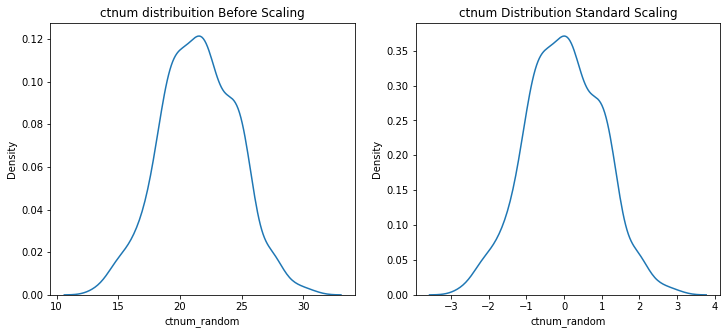

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('ctnum distribuition Before Scaling')
sns.kdeplot(X_train['ctnum_random'], ax=ax1)

# after scaling
ax2.set_title('ctnum Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['ctnum_random'], ax=ax2)
plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [80]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [93]:
y_pred_lr = lr.predict(X_test)
y_pred_scaled_lr = lr_scaled.predict(X_test_scaled)

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [95]:
print("Actual",accuracy_score(y_test,y_pred_lr))
print("Scaled",accuracy_score(y_test,y_pred_scaled_lr))

Actual 0.9702970297029703
Scaled 0.9603960396039604


In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [86]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [91]:
y_pred_dt = dt.predict(X_test)
y_pred_scaled_dt = dt_scaled.predict(X_test_scaled)

In [92]:
print("Actual",accuracy_score(y_test,y_pred_dt))
print("Scaled",accuracy_score(y_test,y_pred_scaled_dt))

Actual 0.900990099009901
Scaled 0.8910891089108911


In [96]:
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred_lr))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred_dt))

Accuracy of Logistic Regression 0.9702970297029703
Accuracy of Decision Trees 0.900990099009901


In [99]:
confusion_matrix(y_test,y_pred_lr)

array([[13,  0],
       [ 3, 85]])

In [101]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_lr),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



,0,1
0,13,0
1,3,85


In [131]:
print("XgBoost Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_xg),columns=list(range(0,2)))

XgBoost Confusion Matrix



,0,1
0,13,0
1,3,85


In [132]:
print("naive bayes Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_nb),columns=list(range(0,2)))

naive bayes Confusion Matrix



NameError: ignored

In [102]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred_dt),columns=list(range(0,2)))

Decision Tree Confusion Matrix



,0,1
0,9,4
1,6,82


In [103]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred_lr
result['Decision Tree Prediction'] = y_pred_dt

In [104]:
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Prediction
117,1,1,1
93,1,0,0
78,1,1,1
209,1,1,1
25,1,1,1
46,1,1,1
431,0,0,1
294,1,1,1
333,1,1,1
336,1,1,1


In [105]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [106]:
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred_lr),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred_lr))
print("Recall - ",recall_score(y_test,y_pred_lr))
print("F1 score - ",f1_score(y_test,y_pred_lr))

For Logistic regression Model
--------------------------------------------------
    0   1
0  13   0
1   3  85
--------------------------------------------------
Precision -  1.0
Recall -  0.9659090909090909
F1 score -  0.9826589595375723


In [107]:
print("For DT Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred_dt),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred_dt))
print("Recall - ",recall_score(y_test,y_pred_dt))
print("F1 score - ",f1_score(y_test,y_pred_dt))

For DT Model
--------------------------------------------------
   0   1
0  9   4
1  6  82
--------------------------------------------------
Precision -  0.9534883720930233
Recall -  0.9318181818181818
F1 score -  0.942528735632184


In [108]:
precision_score(y_test,y_pred_lr,average=None)

array([0.8125, 1.    ])

In [109]:
precision_score(y_test,y_pred_dt,average=None)

array([0.6       , 0.95348837])

In [110]:
recall_score(y_test,y_pred_dt,average=None)

array([0.69230769, 0.93181818])

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [123]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier()

In [124]:
y_pred_xg = xgb.predict(X_test)

In [112]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [113]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [125]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
xg_probs = xgb.predict_proba(X_test)

In [126]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
xg_probs = xg_probs[:, 1]

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score

In [127]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
xg_auc = roc_auc_score(y_test, xg_probs)

In [128]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('XgBoost: AUROC = %.3f' % (xg_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.978
Naive Bayes: AUROC = 0.954
XgBoost: AUROC = 0.996


In [129]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_probs)

In [121]:
import matplotlib.pyplot as plt

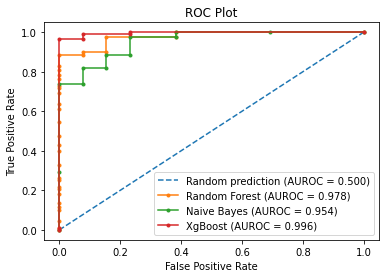

In [130]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(xg_fpr, xg_tpr, marker='.', label='XgBoost (AUROC = %0.3f)' % xg_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()